## 实验：图论求解航线规划问题

### 实验概要

我们将使用迄今为止学到的图的概念，通过真实的业务数据，了解如何解决实际问题。

![](./img/airport-2373727_640_02.jpg)

### 算法介绍

我们将采用 Dijkstra 最短路径算法，通过图论求解各个机场间的最短路径。Dijkstra 最短路径算法被广泛应用在互联网路由协议中，如：OSPF、ISIS 等，从而决定数据包如何在不同的服务器与网络设备之间进行交换转发。

其基本算法思想如下图所示：

![](../images/Dijkstras_02.gif)

在本实验中，该算法将帮助我们找到从源节点到给定图的所有节点的最短路径。其大致流程如下：

1. 创建一个 sptSet（最短路径树集），它跟踪最短路径树中包含的节点，即计算并最终确定与源顶点的最小距离。最初，此设置为空。
2. 为输入图中的所有顶点指定距离值。我们为源节点指定值 `0`，为所有剩余顶点指定 `INFINITE` 值（$\infty$）。
3. 直到 sptSet 不包含所有顶点，我们遵循以下子步骤：
   - 在图中选择一个不在 sptSet 中，并且最接近源节点的节点
   - 在 sptSet 中包含该节点
   - 更新所有相邻顶点的距离

### 实验目标

在本实验中，我们将采用真实的美国航班数据集，基于图论求出各个城市间的航班选择最短路径。对于成熟而庞大的交通运输系统 —— 小到城市内的地铁、公交换乘；大至国内的航班、高铁中转，都具有非常重大的意义。譬如：在 12306 上就有中转换乘的购票选项，满足全国各地各类人群的出行需求。

我们将从这个庞大的数据集中截取一小部分用于实验 ——

- **Year：** 航班日期（年）
- **Month：** 航班日期（月）
- **DayofMonth：** 航班日期（日）
- **DayOfWeek：** 航班日期（周几）
- **DepTime：** 实际起飞时间
- **CRSDepTime：** 预计起飞时间
- **ArrTime：** 实际抵达时间
- **CRSArrTime：** 预计抵达时间
- **AirTime：** 航班总飞行时间
- **Origin：** 出发城市
- **Dest：** 目的城市
- **Distance：** 起飞与降落城市之间的距离

### 实验步骤

请参考左侧导航栏

In [1]:
import sys
 
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):
        '''
        This method makes sure that the graph is symmetrical. 
        In other words, if there's a path from node A to B with a value V, 
        there needs to be a path from node B to node A with a value V.
        '''
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    
    def get_nodes(self):
        "Returns the nodes of the graph."
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Returns the neighbors of a node."
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Returns the value of an edge between two nodes."
        return self.graph[node1][node2]

In [2]:
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

In [3]:
def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    # Add the start node manually
    path.append(start_node)
    
    print("We found the following best path with a value of {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))

In [4]:
nodes = ["Reykjavik", "Oslo", "Moscow", "London", "Rome", "Berlin", "Belgrade", "Athens"]
 
init_graph = {}
for node in nodes:
    init_graph[node] = {}
    
init_graph["Reykjavik"]["Oslo"] = 5
init_graph["Reykjavik"]["London"] = 4
init_graph["Oslo"]["Berlin"] = 1
init_graph["Oslo"]["Moscow"] = 3
init_graph["Moscow"]["Belgrade"] = 5
init_graph["Moscow"]["Athens"] = 4
init_graph["Athens"]["Belgrade"] = 1
init_graph["Rome"]["Berlin"] = 2
init_graph["Rome"]["Athens"] = 2

In [5]:
graph = Graph(nodes, init_graph)

In [6]:
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="Reykjavik")

In [7]:
print_result(previous_nodes, shortest_path, start_node="Reykjavik", target_node="Belgrade")

We found the following best path with a value of 11.
Reykjavik -> Oslo -> Berlin -> Rome -> Athens -> Belgrade


### 1. 导入依赖库

我们将使用 Numpy 与 Pandas 库读取数据并进行分析。

In [8]:
import pandas as pd # 导入 Pandas
import numpy as np  # 导入 numpy

### 2. 加载数据并查阅

使用 Pandas 的 `pd.read_csv` 函数，将本地数据读取为 DataFrame 格式。

In [9]:
# 加载本地数据
data = pd.read_csv('./data/air_traffic.csv')

# 默认输出数据表前5行数据
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515


这里，`CRSDepTime`，`CRSArrTime`，`DepTime` 和 `ArrTime` 分别代表预定的出发时间，预定的到达时间，实际出发时间和实际到达时间。`Origin` 和	`Dest` 就是出发城市和目的城市。

### 3. 使用数据定义图

从一个机场到另一个机场通常可以有多条路径，目的是找到所有机场之间最短的路径。我们可以通过两种方式将路径定义为最短路径：

- 按飞行距离
- 按飞机时间

我们可以使用迄今为止学到的图的概念来解决这些问题。

我们要做到就是标识节点和边 —— 我们可以通过将所有机场表示为节点，以及它们之间的路径作为边来将问题转换为图。

我们将使用 NetworkX 来创建和可视化图形。NetworkX 是一个 Python 包，用于创建，操作和研究复杂网络的结构，动态和功能。你可以[参阅 NetworkX 的文档](https://networkx.org/documentation/stable/index.html)。

我们将使用数据集为图创建边和顶点：

In [10]:
import networkx as nx

# 从pandas读取名为data的DataFrame
# 以DataFrame内'Origin'列作为源节点
# 以DataFrame内'Dest'列作为目标节点
# 并且自动在源/目标节点间连边
df = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)

它将自动存储节点和边。

快速浏览一下我们创建的图的节点和边：

In [11]:
df.nodes()

NodeView(('IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP'))

In [12]:
df.edges()

EdgeView([('IAD', 'TPA'), ('IAD', 'LAS'), ('IAD', 'MCO'), ('IAD', 'MDW'), ('TPA', 'IND'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'ORF'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PHX'), ('TPA', 'PIT'), ('TPA', 'PVD'), ('TPA', 'RDU'), ('TPA', 'SAT'), ('TPA', 'SDF'), ('TPA', 'STL'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'AUS'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('IND', 'BWI'), ('IND', 'JAX'), ('IND', 'LAS'), ('IND', 'MCI'), ('IND', 'MCO'), ('IND', 'MDW'), ('IND', 'PHX'), ('BWI', 'ISP'), ('BWI', 'JAN'), ('BWI', 'JAX'), ('BWI', 'LAS'), ('BWI', 'LIT'), ('BWI', 'MCI'), ('BWI', 'MCO'), ('BWI', 'MDW'), ('BWI', 'MHT'), ('BWI', 'MSY'), ('BWI', 'OKC'), ('BWI', 'ORF'), ('BWI', 'PBI'), ('BWI', 'PHX'), ('BWI', 'PIT'), ('BWI', 'PVD'), ('BWI', 'RDU'), ('BWI', 'RSW'), ('BWI', 'SAN'), ('BWI', 'SAT'), ('BWI', 'SDF')

### 4. 绘制图

使用 matplotlib 和 NetworkX 的 `draw_networkx()` 函数绘制和可视化图形 。

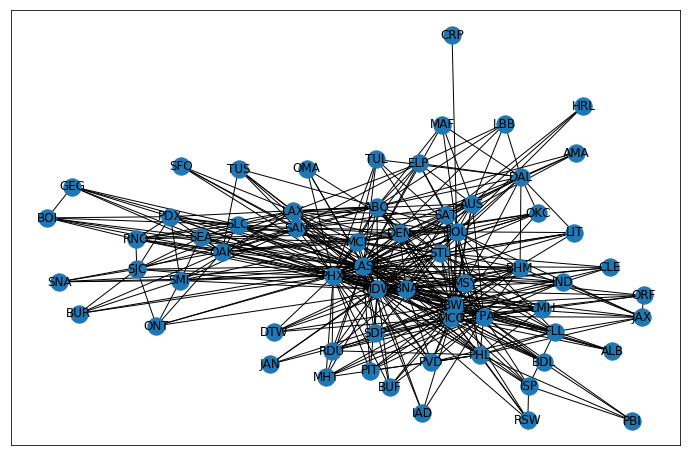

In [13]:
import matplotlib.pyplot as plt # 导入matplotlib

# 魔法命令，让matplotlib图形直接在Jupyter Notebook中显示
%matplotlib inline

# 设置图的尺寸
plt.figure(figsize=(12,8))

# 绘制图并显示
nx.draw_networkx(df, with_labels=True)

上述可视化代表了不同的飞行路线。假设乘客想要从 `AMA` （阿马里洛）到 `PBI` （西棕榈滩）采取最短路线。图论可以揭示这一点。

### 5. 求解最短路径

我们尝试根据机场 `AMA` 和 `PBI` 之间的通话时间来计算最短路径。我们将使用 Dijkstra 最短路径算法。

该算法找到从源结点到给定图的所有节点的最短路径。下面我们就实现这个算法，并尝试计算机场之间的最短距离。

In [14]:
# 基于飞行距离求解最短路径
shortest_path_distance = nx.dijkstra_path(df, source='AMA', 
                                          target='PBI', weight='Distance') 
shortest_path_distance

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']

这是两个机场之间根据它们之间的距离尽可能短的路径。

**阿马里洛 -> 达拉斯 -> 新奥尔良 -> 坦帕 -> 西棕榈滩**

我们还可以通过改变参数 `weight`，来计算基于飞行时间的最短路径：

In [15]:
# 基于飞行时间求解最短路径
shortest_path_airtime = nx.dijkstra_path(df, source='AMA', 
                                         target='PBI', weight='AirTime') 
shortest_path_airtime

['AMA', 'DAL', 'BHM', 'TPA', 'PBI']

这是两个机场之间根据它们之间的飞行时间尽可能短的路径。

**阿马里洛 -> 达拉斯 -> 伯明翰 -> 坦帕 -> 西棕榈滩**

### 实验小结

在本实验中，你实现了从真实的数据集中加载数据并形成图。

同时，采用 Dijkstra 最短路径算法，通过图论分别根据飞行距离和时间，求解各个机场间的最短路径问题。这只是图论的众多应用之一。我们可以将它应用于几乎任何类型的问题，并获得解决方案和可视化。图论的应用还包括 ——

- 找到发布帖子的最佳途径（传播路径可视化）
- 通信网络基站。例如，可以使用有向图来表示网站的链接结构
- 使用人们的社交连接图，确定一个人的社交行为
- 航空公司案例研究中讨论的旅行计划（优化问题）